# **Diabetes Prediction**

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import warnings
from tabulate import tabulate
warnings.simplefilter('ignore')

**Data Preprocessing**

In [3]:
df = pd.read_csv('diabetes-vid.csv')
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50    dead  
1                     0.351   31   alive  
2                     0.672   32    dead  
3                     0.167   21   alive  
4                     2.288   33    dead

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

In [8]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64

In [9]:
df['Outcome'] = df['Outcome'].apply(lambda x: 1 if x !='alive' else 0)

**Exploratory Data Analysis**

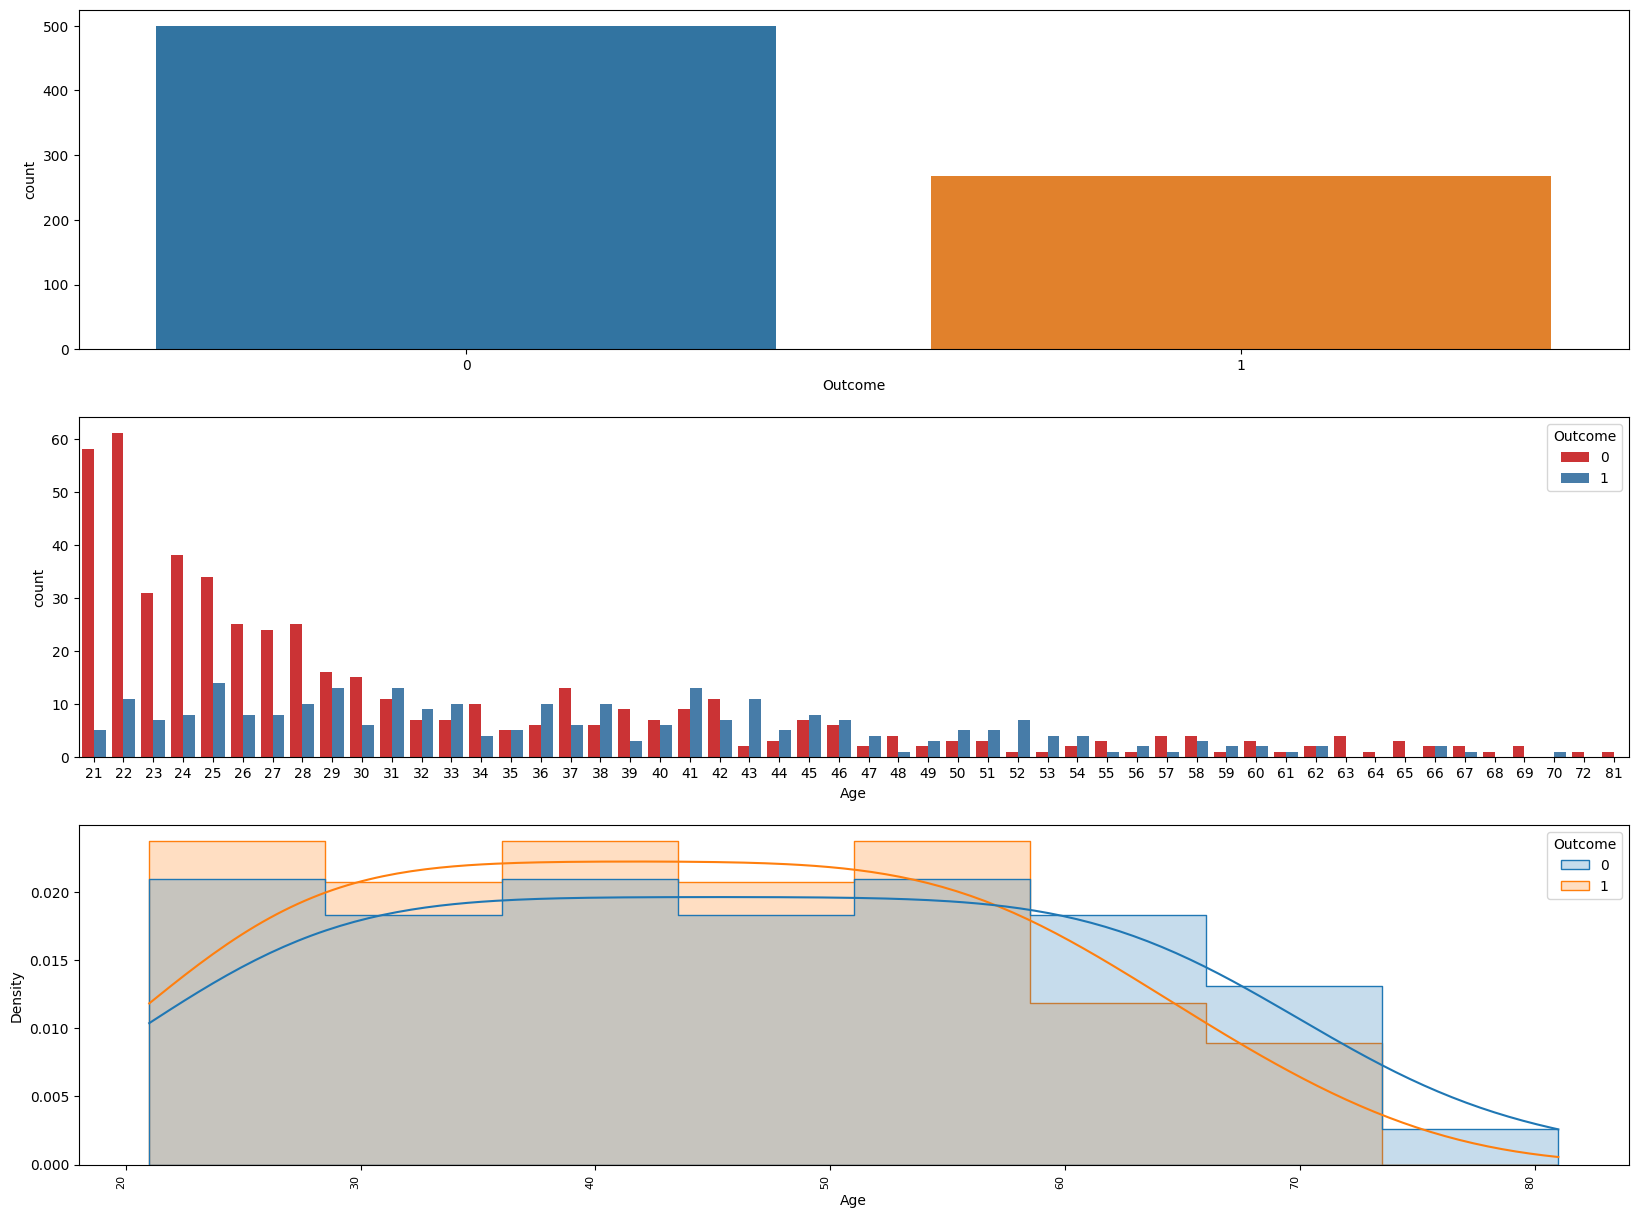

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

outcome_count = df.groupby(['Age', 'Outcome'])['Outcome'].count()

sns.countplot(x=df['Outcome'],ax=ax[0])
sns.countplot(data=df, x='Age', hue='Outcome', palette='Set1',ax=ax[1])
sns.histplot(data=outcome_count, x='Age', hue='Outcome', element='step', stat='density',kde = True ,common_norm=False,ax=ax[2])
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()

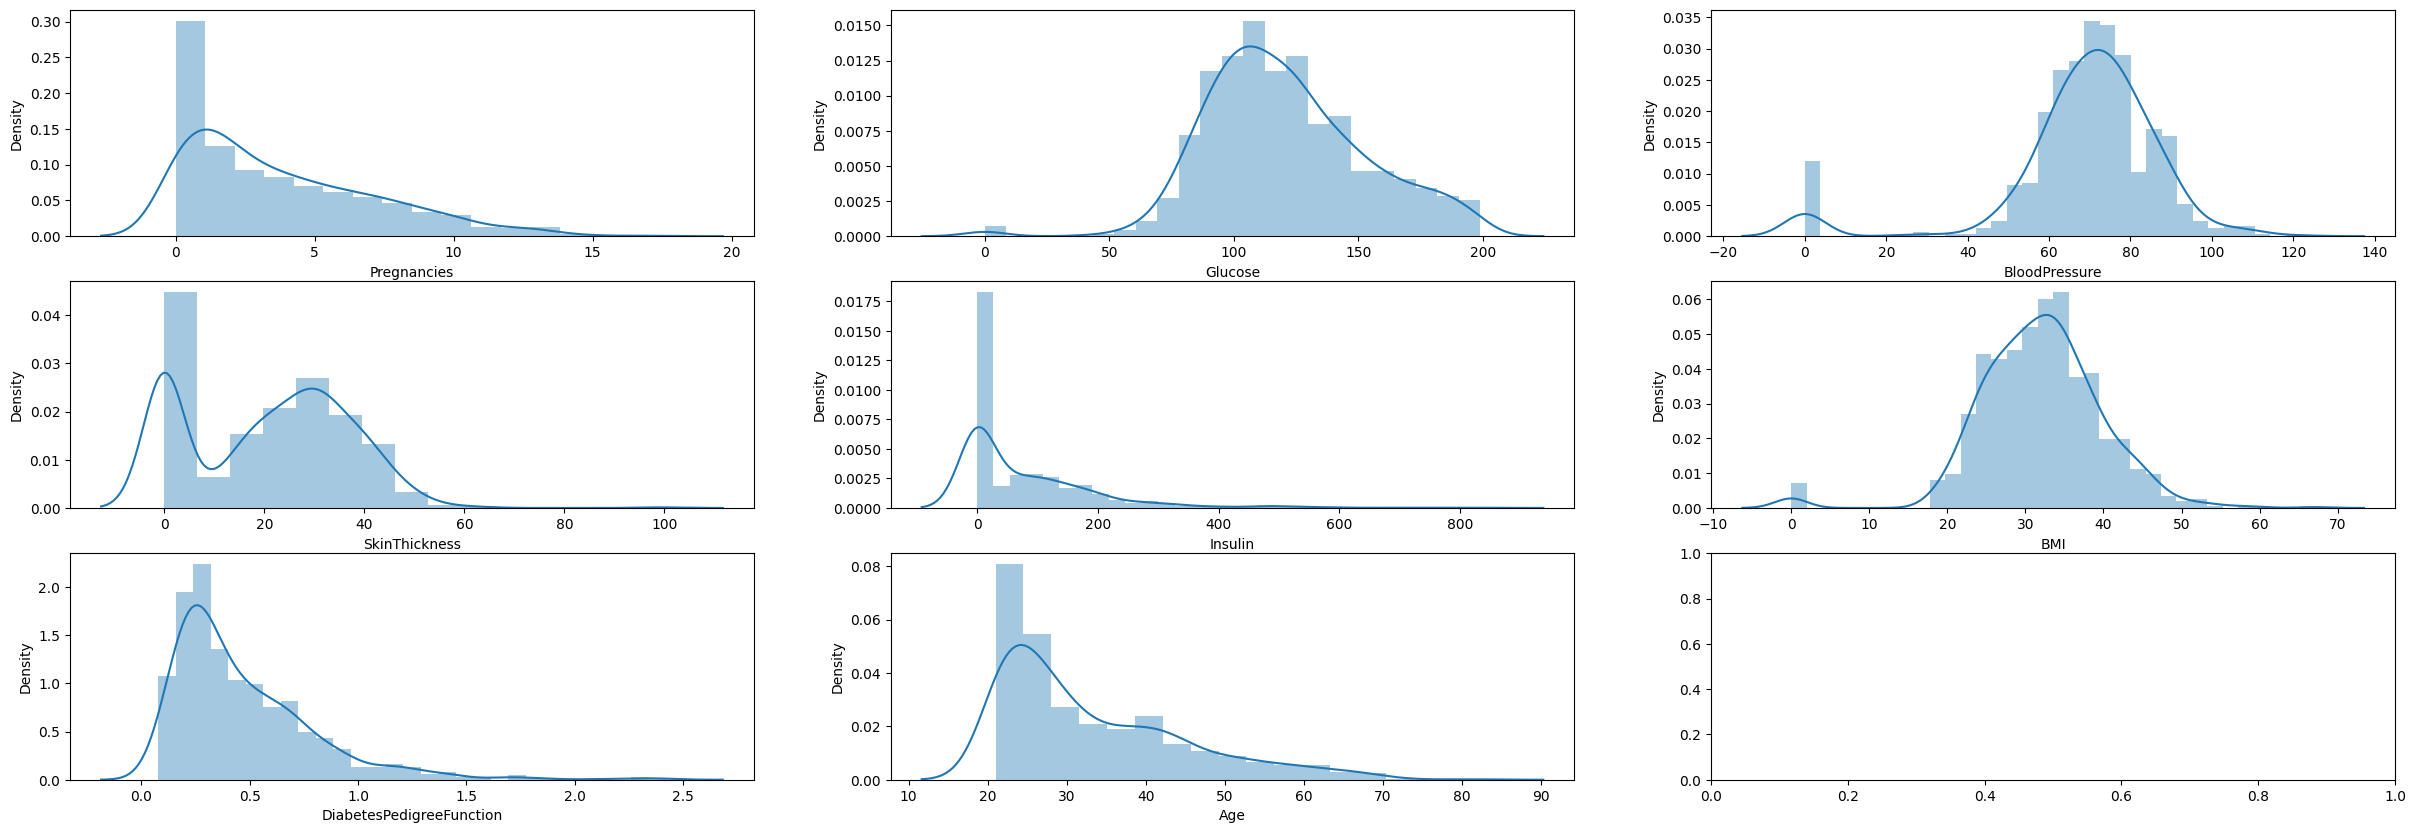

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(30, 10))

sns.distplot(df['Pregnancies'],ax=ax[0,0])
sns.distplot(df['Glucose'],ax=ax[0,1])
sns.distplot(df['BloodPressure'],ax=ax[0,2])
sns.distplot(df['SkinThickness'],ax=ax[1,0])
sns.distplot(df['Insulin'],ax=ax[1,1])
sns.distplot(df['BMI'],ax=ax[1,2])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax[2,0])
sns.distplot(df['Age'],ax=ax[2,1])
plt.show()

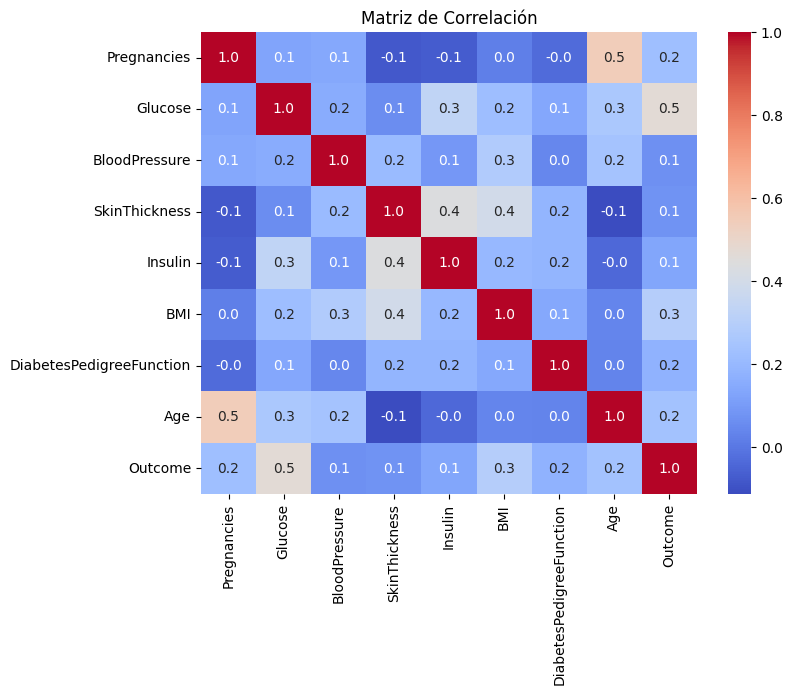

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Matriz de Correlación')
plt.show()

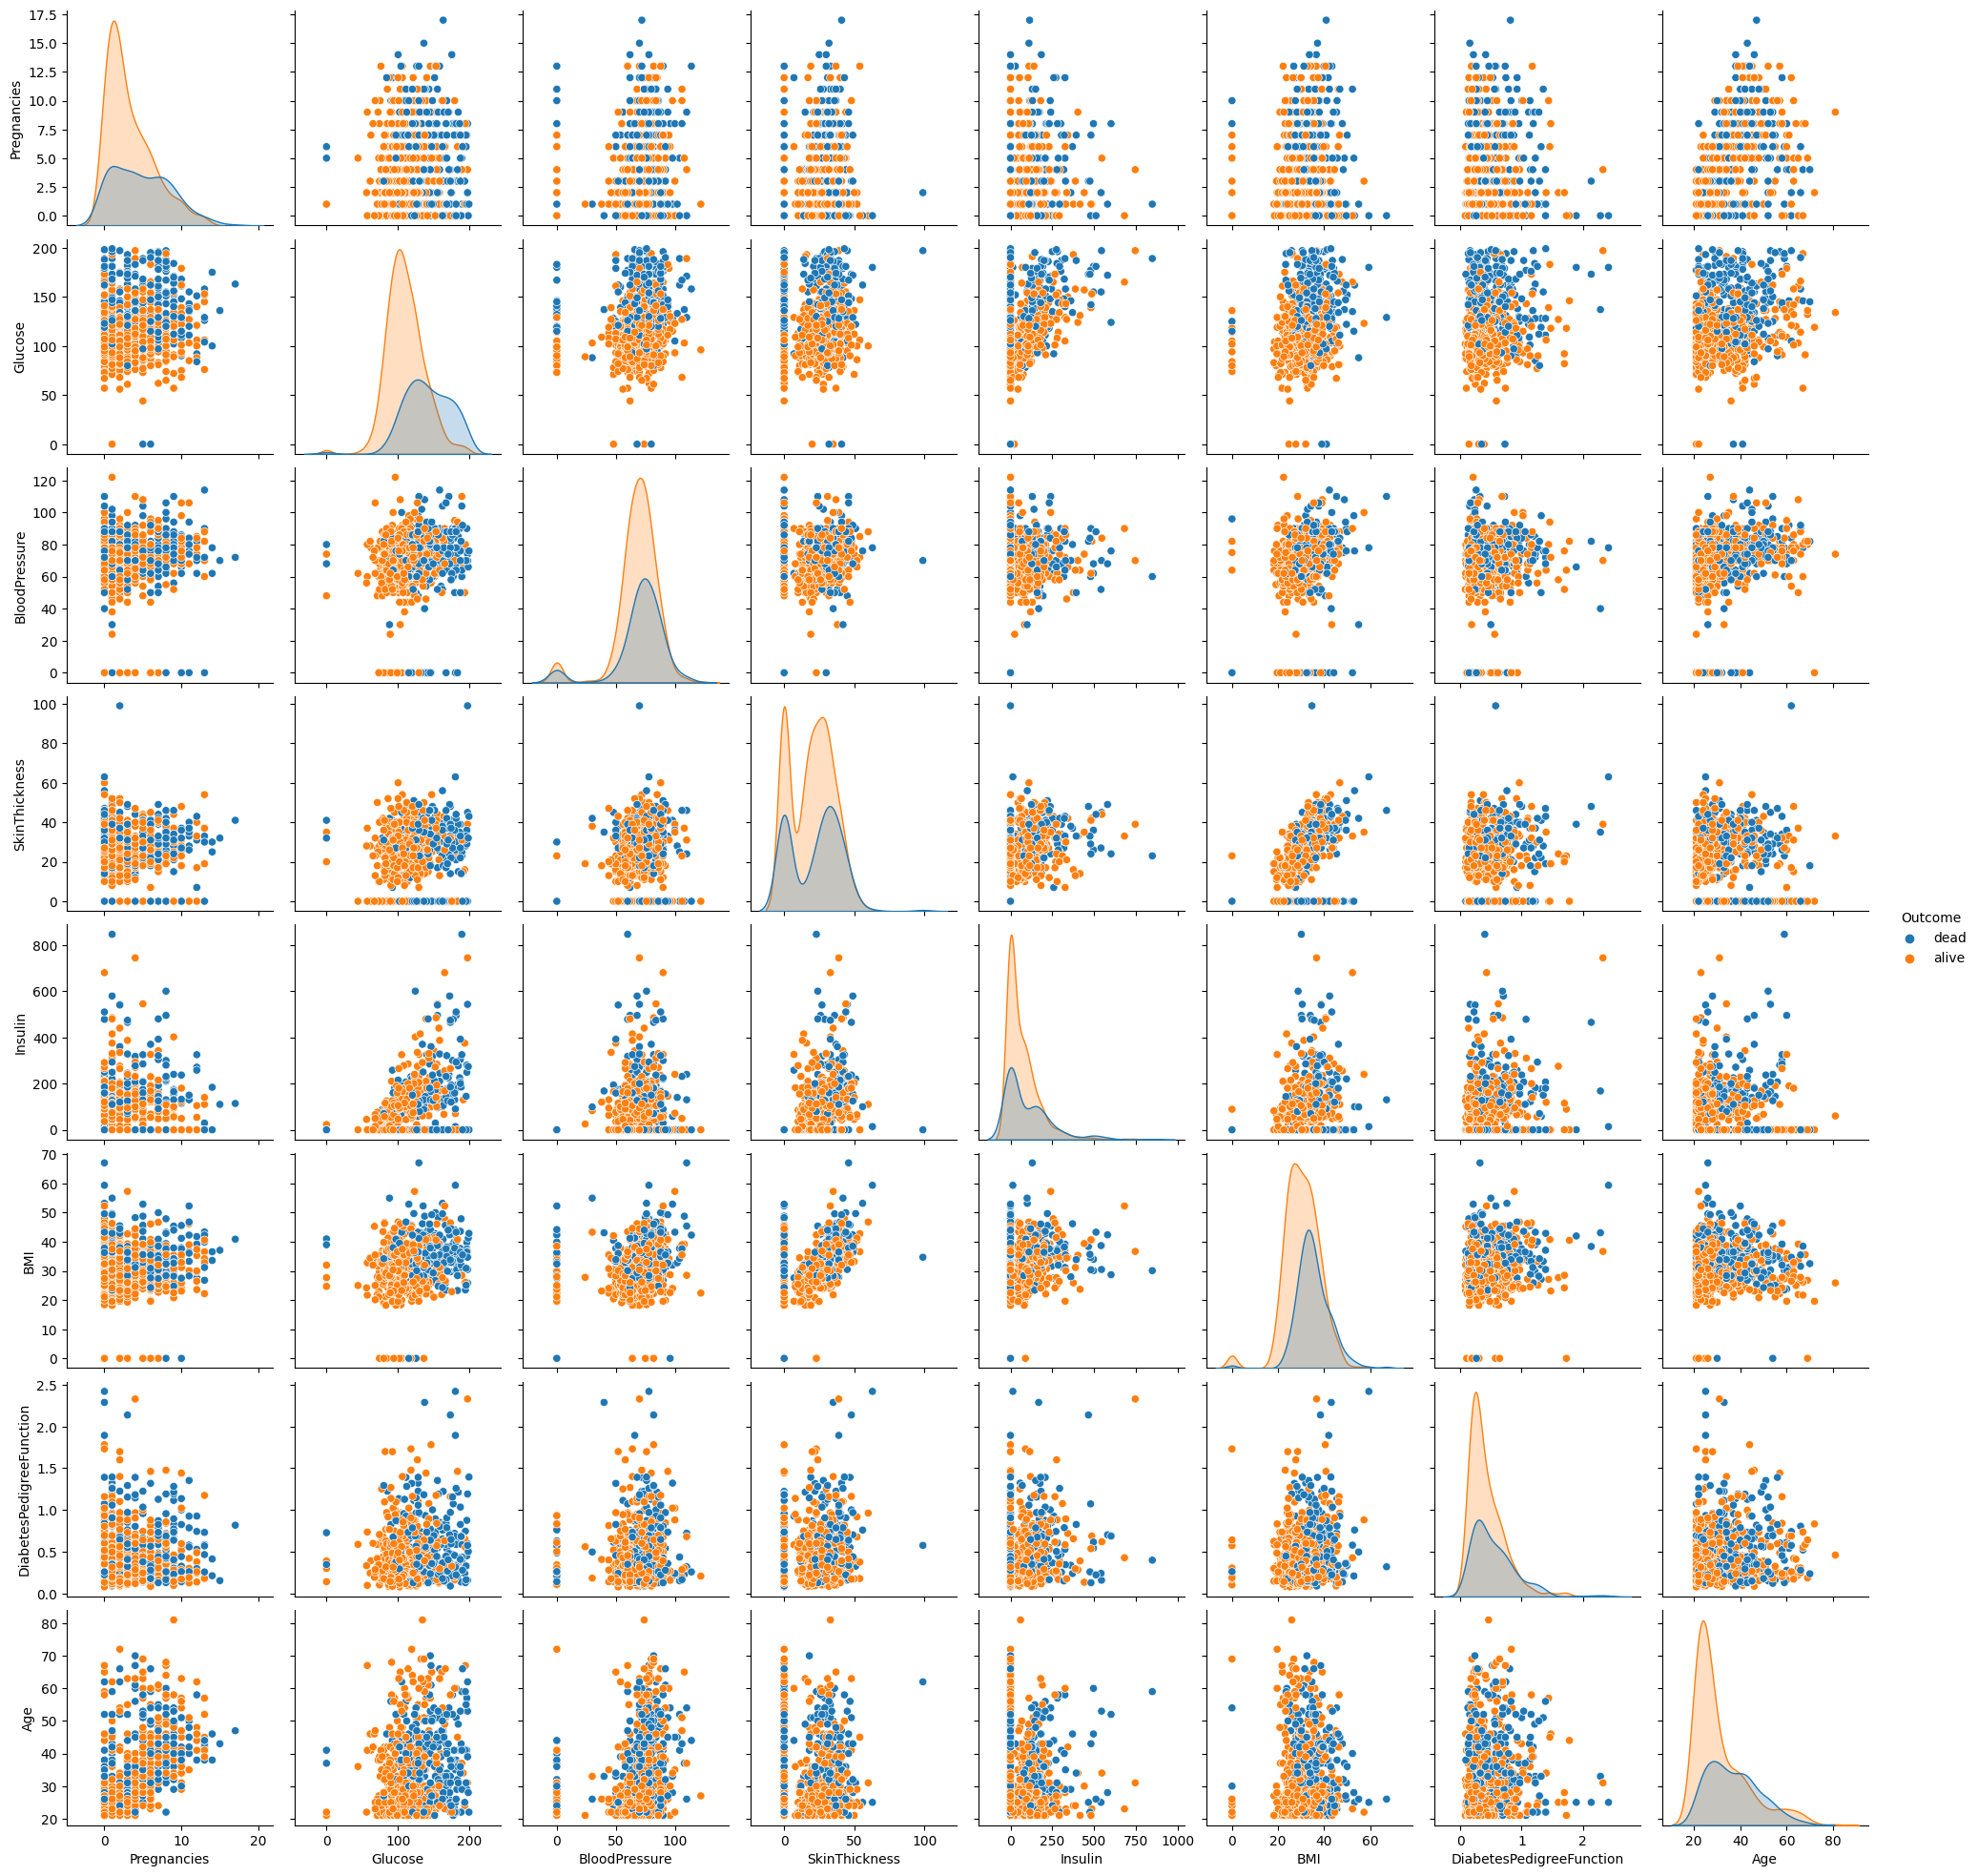

In [ ]:
sns.pairplot(df, hue = 'Outcome')

**Data Scaler**

In [28]:
array = df.values
X = array[ : , 0:8]
Y = array[ :, 8]
names = df.columns.tolist()

In [29]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
NormalizedX = scaler.transform(X)

print(names)
print(NormalizedX)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
[[0.03355237 0.82762513 0.40262844 ... 0.18789327 0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 ... 0.22407851 0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 ... 0.11765825 0.00339341 0.16159073]
 ...
 [0.02691539 0.65135243 0.38758161 ... 0.14103664 0.00131885 0.16149234]
 [0.00665306 0.83828547 0.39918356 ... 0.20025708 0.00232192 0.31269379]
 [0.00791454 0.73605211 0.55401772 ... 0.24060198 0.00249308 0.18203439]]


In [31]:
normalized_df = pd.DataFrame(NormalizedX, columns=names[:8])
normalized_df['Outcome'] = Y
normalized_df.head(1)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0     0.033552  0.827625       0.402628       0.195722      0.0  0.187893   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.003506  0.279603      1.0

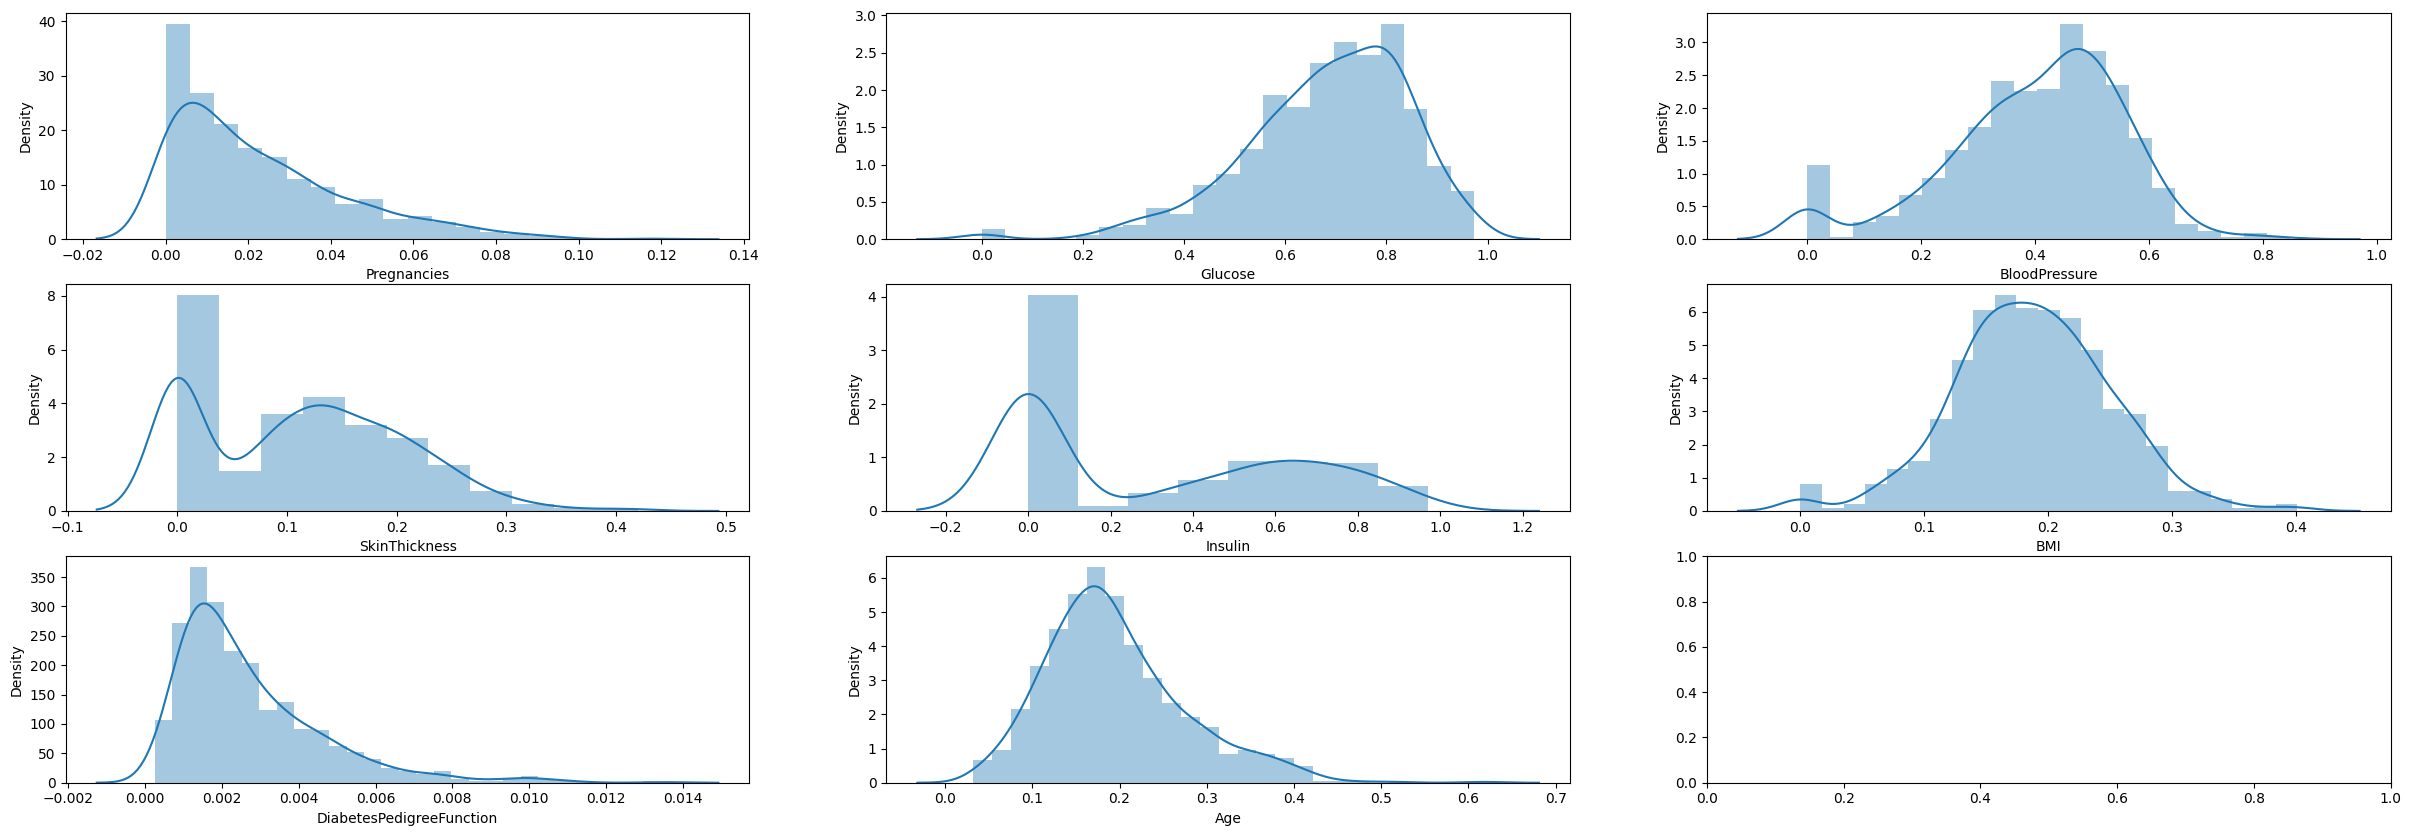

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(30, 10))

sns.distplot(normalized_df['Pregnancies'],ax=ax[0,0])
sns.distplot(normalized_df['Glucose'],ax=ax[0,1])
sns.distplot(normalized_df['BloodPressure'],ax=ax[0,2])
sns.distplot(normalized_df['SkinThickness'],ax=ax[1,0])
sns.distplot(normalized_df['Insulin'],ax=ax[1,1])
sns.distplot(normalized_df['BMI'],ax=ax[1,2])
sns.distplot(normalized_df['DiabetesPedigreeFunction'],ax=ax[2,0])
sns.distplot(normalized_df['Age'],ax=ax[2,1])
plt.show()

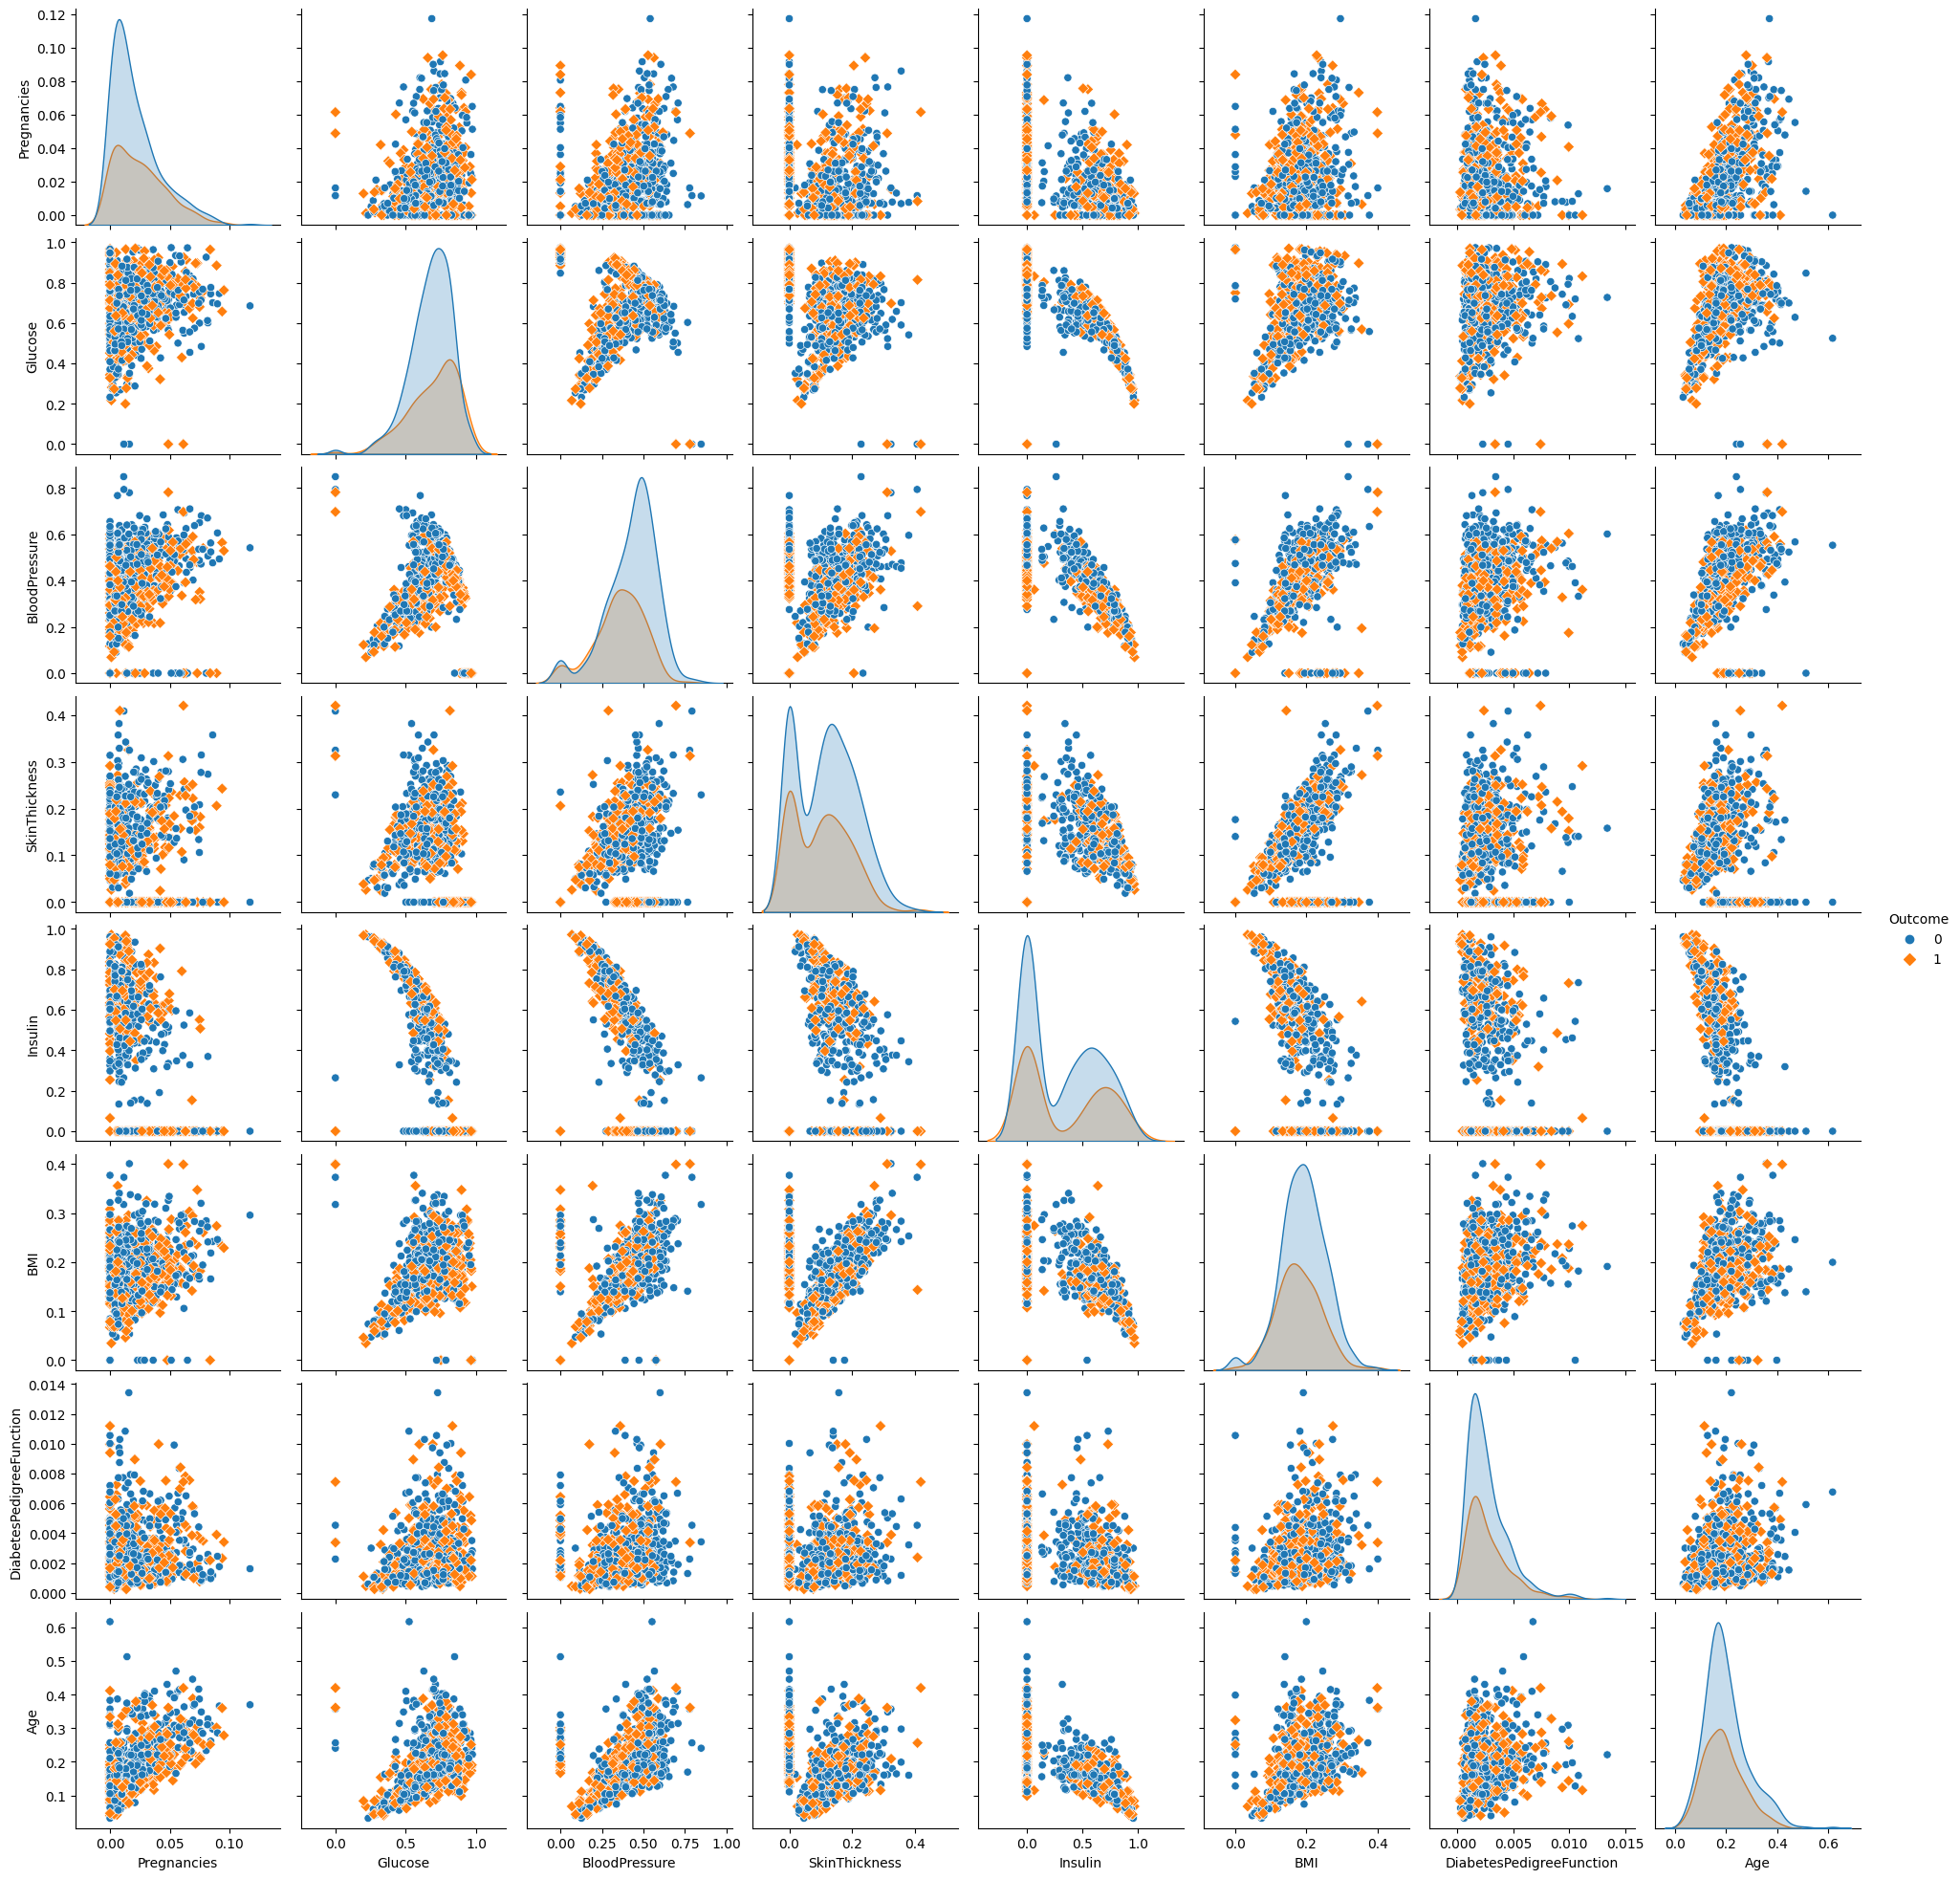

In [ ]:
sns.pairplot(normalized_df, hue = 'Outcome', markers=["o", "D"])

**Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Outcome', axis = 1), df['Outcome'], test_size=0.25, random_state=42)

**Modeling and Evaluation**


**LogisticRegression**

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)
model_pred = model.predict(X_test)

print(classification_report(Y_test, model_pred))
print("accuracy: ",accuracy_score(Y_test, model_pred))
print("mean_absolute_error: ",mean_absolute_error(Y_test, model_pred))
print("mean_squared_error: ",mean_squared_error(Y_test, model_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

accuracy:  0.7291666666666666
mean_absolute_error:  0.2708333333333333
mean_squared_error:  0.2708333333333333


**RandomForestClassifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_RFC =RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train, Y_train)
model_RFC.score(X_train, Y_train)
model_RFC_Pred = model_RFC.predict(X_test)
print(classification_report(Y_test, model_RFC_Pred))

print("accuracy: ",accuracy_score(Y_test, model_RFC_Pred))
print("mean_absolute_error: ",mean_absolute_error(Y_test, model_RFC_Pred))
print("mean_squared_error: ",mean_squared_error(Y_test, model_RFC_Pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       123
           1       0.62      0.65      0.64        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.74       192

accuracy:  0.734375
mean_absolute_error:  0.265625
mean_squared_error:  0.265625


**SVC**

In [43]:
from sklearn.svm import SVC

model_SVC = SVC(kernel = 'linear', probability=True ,random_state = 0)
model_SVC.fit(X_train, Y_train)
model_SVC.score(X_train, Y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(Y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(Y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(Y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(Y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       123
           1       0.62      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

accuracy:  0.7291666666666666
mean_absolute_error:  0.2708333333333333
mean_squared_error:  0.2708333333333333


**KNeighborsClassifier**

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, Y_train)
model_NEG.score(X_train, Y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(Y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(Y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(Y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(Y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.52      0.55      0.54        69

    accuracy                           0.66       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.66      0.66       192

accuracy:  0.65625
mean_absolute_error:  0.34375
mean_squared_error:  0.34375


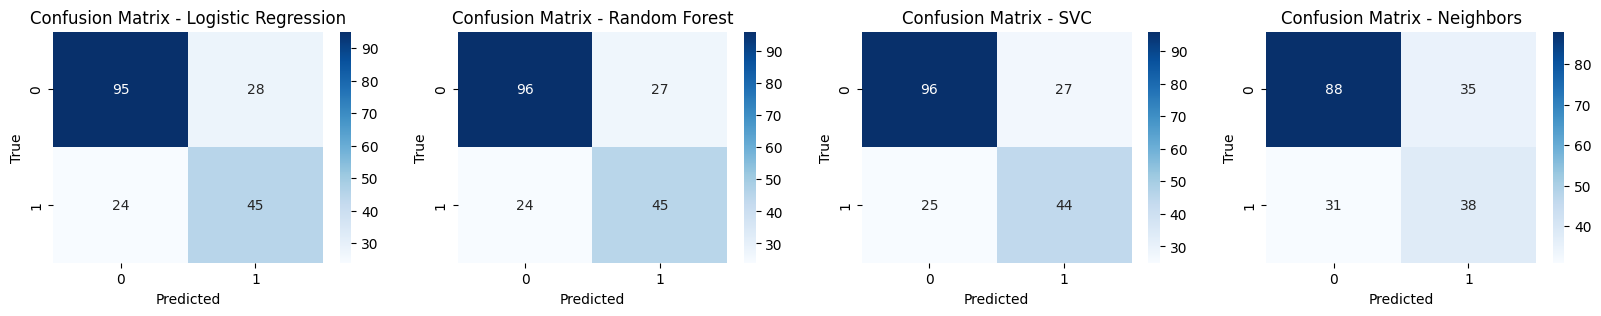

In [37]:
from sklearn.metrics import confusion_matrix

RLOG = confusion_matrix(Y_test, model_pred)
RMFC = confusion_matrix(Y_test, model_RFC_Pred)
SVC_ = confusion_matrix(Y_test, model_SVC_Pred)
NEG = confusion_matrix(Y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 4, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - SVC')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')
plt.show()

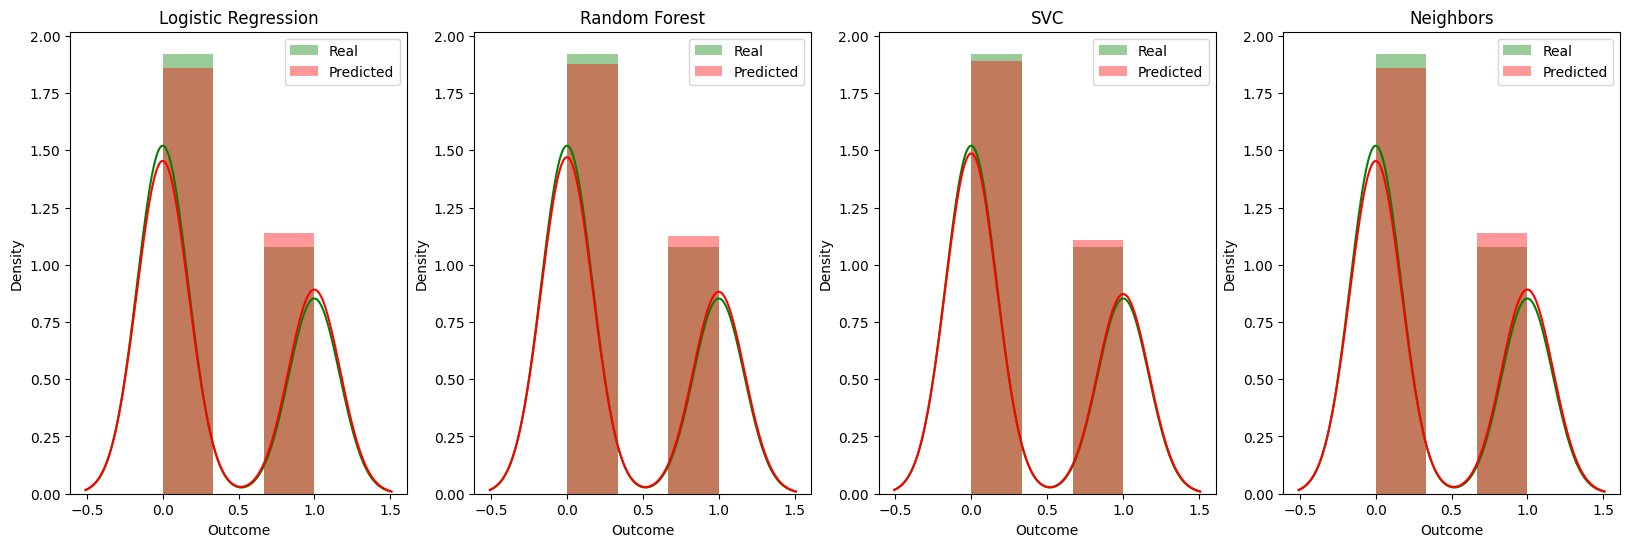

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.distplot(Y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(Y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_RFC_Pred, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(Y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(Y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('SVC')
ax[3].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

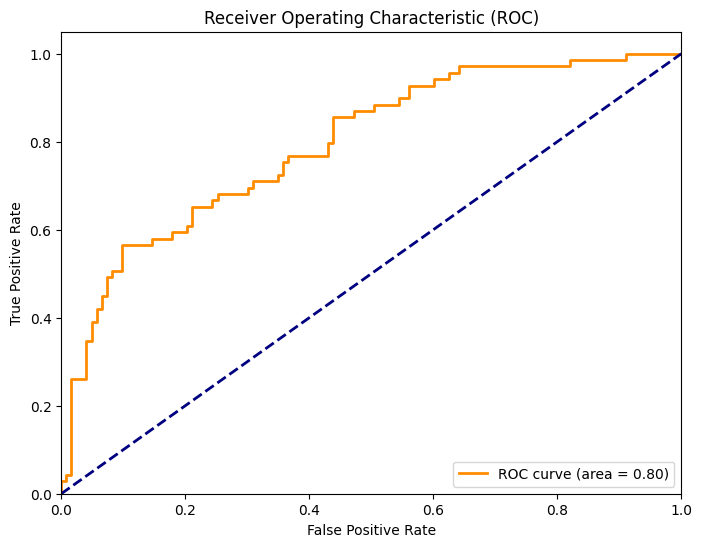

In [ ]:
from sklearn.metrics import roc_curve, auc

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

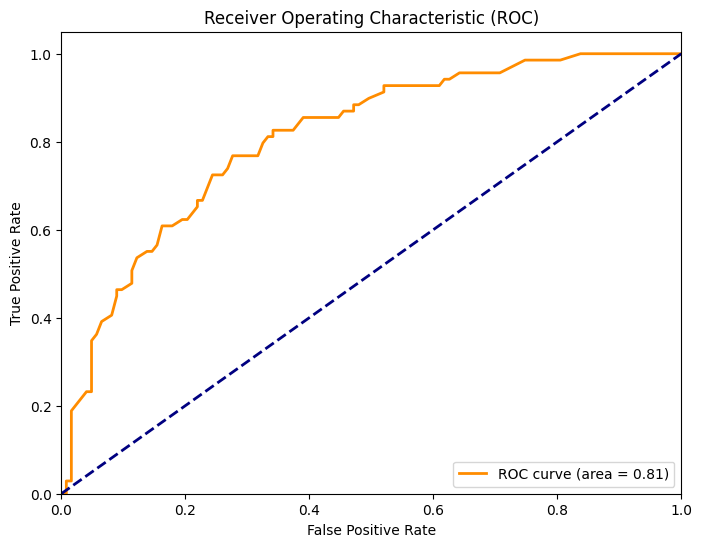

In [ ]:
probs = model_RFC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

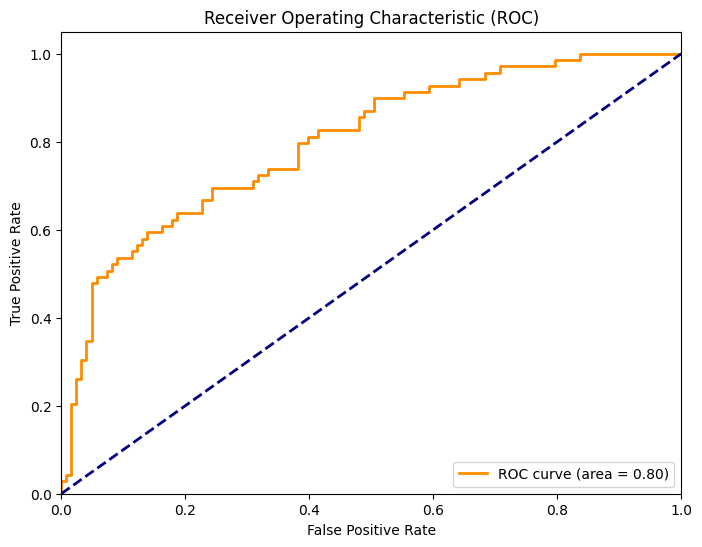

In [ ]:
probs = model_SVC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

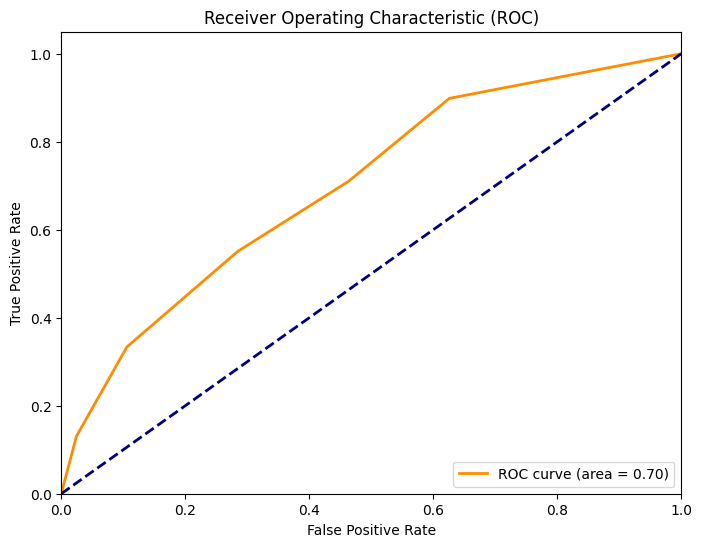

In [ ]:
probs = model_NEG.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()